## Machine Learning and Statistics, Winter 21/22

#### Overview of the scipy.stats Python library

* A clear and concise overview of the scipy.stats Python library.
* An example hypothesis test using ANOVA. You should find a data set on which it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are met, and then perform and display the results of your ANOVA using scipy.stats.

![image](https://www.fullstackpython.com/img/logos/scipy.png)

## Table of Contents:

1. [Introduction](#introduction)
    * [SciPy](#sp)
    * [SciPy Stats](#ss)
    * [ANOVA](#a)
    
 
2. [Setup](#setup)
    * [Dataset](#d)
    * [Assumptions](#a)
    
    
3. [Testing](#t)
    * [Logistic Regression](#lr)
    * [Support Vector Machines](#svm)
    * [K-Means Clustering](#kmc)
    
    
4. [References](#ref)

# Introduction <a name="introduction"></a>

## SciPy <a name="sp"></a>
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)



"SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data." [1](https://scipy.github.io/devdocs/tutorial/general.html)

SciPy stands for Scientific Python and was created by Travis Olliphant the creator of NumPy, and  it provides functions for optimization, statistics and signal processing. It is primarily written in Python with some elements in C, it is an open source library located in this github repository. [SciPy](https://github.com/scipy/scipy)

SciPy is organized into subpackages that specialise in different scientifc areas listed below:

* ```cluster``` - Clustering algorithms
* ```constants``` - Physical and mathematical constants
* ```fftpack``` - Fast Fourier Transform routines
* ```integrate``` - Integration and ordinary differential equation solvers
* ```interpolate``` - Interpolation and smoothing splines
* ```io``` - Input and Output
* ```linalg``` - Linear algebra
* ```ndimage``` - N-dimensional image processing
* ```odr``` - Orthogonal distance regression
* ```optimize``` - Optimization and root-finding routines
* ```signal``` - Signal processing
* ```sparse``` - Sparse matrices and associated routines
* ```spatial``` - Spatial data structures and algorithms
* ```special``` - Special functions
* ```stats``` - Statistical distributions and functions

This notebook will focus on the ```scipy.stats``` statistical functions package.

## SciPy Stats <a name="ss"></a>
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

The ```scipy.stats``` module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more. [2](https://docs.scipy.org/doc/scipy/reference/stats.html). They are categorized into these subheadings that are available within the package. 

* Continuous distributions
* Multivariate distributions
* Discrete distributions
* Summary statistics
* Frequency statistics
* Correlation functions
* Statistical tests
* Transformations
* Statistical distances
* Random variate generation
* Circular statistical functions
* Contingency table functions
* Plot-tests
* Masked statistics functions
* Univariate and multivariate kernel density estimation

Examples of some of the functions are described below:

### Libraries <a name="l"></a>

In [2]:
#Working with arrays
import numpy as np
#Dataframes
import pandas as pd

#2 libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Alternative Stats package
import statsmodels.stats.weightstats as stat

#Main stats package
import scipy.stats as ss

In [6]:
#plot styles
plt.style.use('seaborn')

#default plot size
plt.rcParams['figure.figsize'] = [8, 8]

### SciPy example functionality

Here we will show a very limited cross section of some of the functionality of the package.

### Continuous distributions
#### Norm
[Official Documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

A normal continuous random variable. This can be used to produce a probability density function in the standardized form, or normal distribution. Produced using the code ```norm.pdf(x, loc, scale)```, the location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.

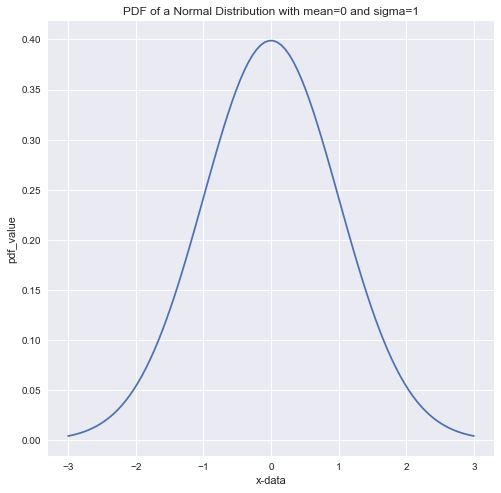

In [7]:
#100 datapoints between -3 and 3
x = np.linspace(-3,3,100)
#Norm function
pdf_result = ss.norm.pdf(x,loc=0,scale=1)

#Plot
plt.plot(x,pdf_result)
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.title("PDF of a Normal Distribution with mean=0 and sigma=1")
plt.show()

Adjusting the mean and standard deviation can easily manipulate the distribution using the ```norm``` function.

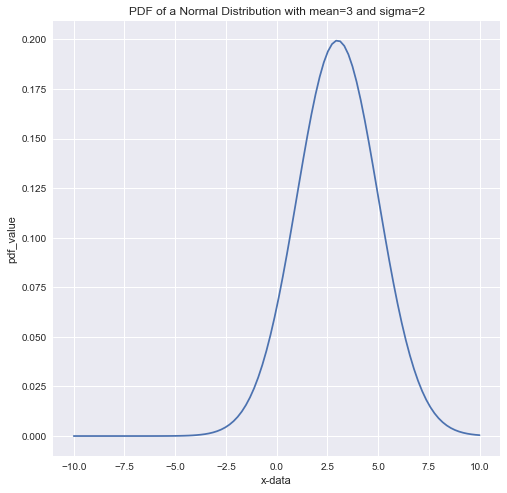

In [8]:
#100 datapoints between -10 and 10
x = np.linspace(-10,10,100)

#Norm function mean=3, sd=2
pdf_result = ss.norm.pdf(x,loc=3,scale=2)

plt.plot(x,pdf_result)
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.title("PDF of a Normal Distribution with mean=3 and sigma=2")
plt.show()